<a href="https://colab.research.google.com/github/marcusRB/uoc-ub-bioinformatics-programming-language/blob/master/4.1_dna_rna_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación para la Bioinformática

Unidad 4: ADN, ARN, secuencias y motivos (Parte 1)
--------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 2. Bajo estas lineas encontrareis Ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.)

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)

In [ ]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


### Instrucciones de uso
A continuación se presentarán explicaciones y ejemplos de uso de la librería BioPython en el contexto del manejo de secuencias de ADN, ARN y proteínas. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

###**Ejercicios de entrenamiento**

### Primeros pasos
Como siempre, vamos a importar la librería y comprobar que todo funciona:

In [ ]:
!pip install biopython
import Bio  #Es importante ejecutar esta celda cada vez que cerremos y abramos el fichero si queremos ejecutar recursos de biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.2 MB/s eta 0:00:00


## Formato FASTA
La información genómica, que abarca desde nucleótidos hasta secuencias de residuos peptídicos, es decir, los aminoácidos fundamentales que componen las proteínas, suele presentarse en formato de archivo FASTA. Este formato es ampliamente reconocido en la comunidad bioinformática y casi se ha establecido como un estándar debido a su popularidad en el manejo de secuencias biológicas.

**La primera línea**, identificada por el símbolo '>', corresponde al encabezado (header) en un archivo en formato FASTA. En este encabezado, comúnmente se incluye información como un identificador, el nombre del organismo, el cromosoma, entre otros datos relevantes (__importante!__ que esta información esté separada por espacios ' '). Es importante destacar que la presencia de esta línea no es obligatoria.

A continuación del encabezado, se presenta **la secuencia**, la cual se extiende hasta el próximo símbolo '>', marcando el comienzo de un nuevo encabezado, o hasta el final del archivo. Por lo general, las líneas que componen la secuencia suelen tener una longitud inferior a 80 caracteres.

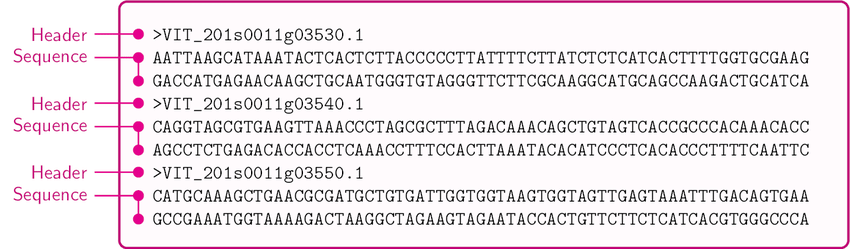


Fuente de la imagen [DOI:10.3390/info7040056](https://www.researchgate.net/figure/A-sample-of-the-Multi-FASTA-file_fig1_309134977)




**Un archivo multifasta** es simplemente un archivo de texto plano que sigue el formato comúnmente utilizado en bioinformática. Este formato es estructurado de la siguiente manera:

>`>Identificador_secuencia_1 Receptor1 Chr1`<br>
>`MTEITAAMVKELRESTGAGMMDCKNALSETNGDFDKAVQLLREKGLGKAAKKADRLAAEG`
>`LVSVKVSDDFTIAAMRPSYLSYEDLDMTFVENEYKALVAELEKENEERRRLKDPNKPEHK`<br>
>`>Identificador_secuencia_2 Receptor2 Chr12`<br>
>`SATVSEINSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHSSTINGVKFEEYLKSQI`
>`ATIGENLVVRRFATLKAGANGVVNGYIHTNGRVGVVIAAACDSAEVASKSRDLLRQICMH`

En el contexto de secuencias de proteínas, los caracteres en mayúscula representan los diferentes residuos, siendo 'M' correspondiente a metionina, 'T' a treonina, y así sucesivamente. Estos residuos forman la cadena de aminoácidos que constituye la proteína codificada por la secuencia. En la siguiente tabla podemos ver la nomenclatura para todos los aminoácidos:

## 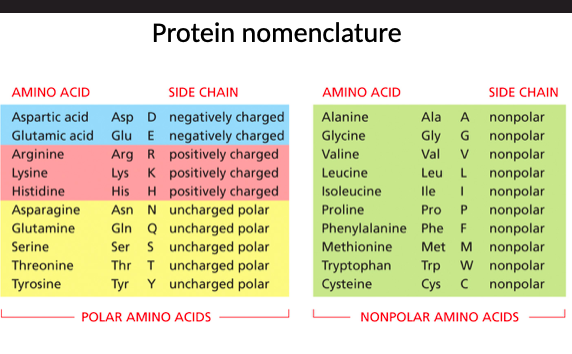
Fuente de la imagen: [chegg.com](https://www.chegg.com/homework-help/questions-and-answers/protein-nomenclature-amino-acid-side-chain-aspartic-acid-asp-d-negatively-charged-glutamic-q84931246)

En cuanto a una secuencia genómica, encontraremos exclusivamente alguna de las cuatro posibles bases: G, A, T o C, en el caso del ADN, o las mismas bases con la excepción de U en lugar de T, si se trata de ARN. Es importante señalar que en estas secuencias también pueden aparecer símbolos adicionales, como saltos de secuencia indicados por el símbolo '-', u otros casos particulares.

Para obtener una lista más detallada de estos símbolos y sus significados, se puede consultar la siguiente referencia: [Lista de Símbolos en Formato FASTA](https://zhanggroup.org/FASTA/#:~:text=FASTA%20format%20is%20a%20text,represented%20using%20single%2Dletter%20codes.). Esta fuente proporciona una visión exhaustiva de los símbolos que pueden aparecer en el formato FASTA y sus interpretaciones específicas.

A continuación en los siguientes links, encontraréis información que os puede ayudar a entender estos conceptos:

-  [Formato fasta en ncbi](https://www.ncbi.nlm.nih.gov/genbank/fastaformat/)

-  [glosario de ensembl](https://www.ensembl.org/info/website/glossary.html)

## Fichero multifasta ejemplo:

En el directorio `data` tenemos un fichero multiFASTA de ejemplo, `multipleSeqs.fa`. Vamos a leerlo con la librería [BioPython](https://biopython.org/docs/1.75/api/index.html):

In [ ]:
from Bio import SeqIO

# Obtenemos todas las secuencias que encuentre en el fichero, indicando el tipo de formato 'fasta'
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/multipleSeqs.fa --no-check-certificate # Descargamos el fichero a nuestro drive


--2024-11-26 13:37:21--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/multipleSeqs.fa
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 18.201.253.30
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|18.201.253.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1718 (1.7K) [text/plain]
Saving to: ‘multipleSeqs.fa’

multipleSeqs.fa     100%[===================>]   1.68K  --.-KB/s    in 0s      

2024-11-26 13:37:22 (327 MB/s) - ‘multipleSeqs.fa’ saved [1718/1718]



In [ ]:
# Leer archivo fasta
records = SeqIO.parse("multipleSeqs.fa", "fasta")
for seq_record in records:
    # Para cada secuencia, imprimiremos su id y su longitud
    print('ID: "', seq_record.id, '" - longitud: ', len(seq_record))

ID: " NT_033779.5 " - longitud:  134
ID: " NC_004353.4 " - longitud:  125
ID: " AM711902.1 " - longitud:  140
ID: " NC_024512.1 " - longitud:  81
ID: " NC_019843.3 " - longitud:  300
ID: " NC_001802.1 " - longitud:  557


Cada uno de los `seq_record` que leemos es un objeto `SeqRecord` que contiene un objeto de tipo `Seq` (una secuencia en BioPython) junto a otros metadatos, como su id, por ejemplo.

Vamos ahora a contar el número de nucleótidos de cada tipo para alcular el porcentaje de cada uno y redondear a 1 decimal. Además vamos a definir un argumento, "organismo", para seleccionar el organismo que queremos seleccionar.: [MODIFICADO]

In [ ]:
from Bio import SeqIO

def contar_nucleotidos_biopython(fasta="multipleSeqs.fa", organismo=''):
    '''fasta: archivo formato fasta
       organismo: Organismo a seleccionar en el multifasta.
                  Si no se especifica, devuelve todos'''
    records = SeqIO.parse(fasta, "fasta")
    nucleotidos = {}
    for seq_record in records:
        # Si no especificamos ningún organismo, nos devuelve toda la información de todos los organismos
        if organismo.lower() in seq_record.description.lower():
            seq_length = len(seq_record.seq)
            nucleotidos[seq_record.id] = {
                # Calcular el porcentaje y redondeamos a 1 decimal con la función round
                "A": round((seq_record.seq.count("A") / seq_length) * 100, 1),
                "C": round((seq_record.seq.count("C") / seq_length) * 100, 1),
                "G": round((seq_record.seq.count("G") / seq_length) * 100, 1),
                "T": round((seq_record.seq.count("T") / seq_length) * 100, 1)
            }
    return nucleotidos


for i, nucl in contar_nucleotidos_biopython("multipleSeqs.fa").items():
      print(f"Secuencia {i}:")
      print(f"Número de A: {nucl['A']}")
      print(f"Número de C: {nucl['C']}")
      print(f"Número de G: {nucl['G']}")
      print(f"Número de T: {nucl['T']}")
      print()

Secuencia NT_033779.5:
Número de A: 29.1
Número de C: 19.4
Número de G: 21.6
Número de T: 29.9

Secuencia NC_004353.4:
Número de A: 36.8
Número de C: 0.0
Número de G: 0.0
Número de T: 63.2

Secuencia AM711902.1:
Número de A: 32.1
Número de C: 23.6
Número de G: 18.6
Número de T: 25.7

Secuencia NC_024512.1:
Número de A: 39.5
Número de C: 21.0
Número de G: 12.3
Número de T: 27.2

Secuencia NC_019843.3:
Número de A: 21.0
Número de C: 20.7
Número de G: 23.3
Número de T: 35.0

Secuencia NC_001802.1:
Número de A: 29.6
Número de C: 20.5
Número de G: 29.8
Número de T: 20.1



Ahora mostramos los resultados si filtramos por "Drosophila":

In [ ]:
for i, nucl in contar_nucleotidos_biopython("multipleSeqs.fa", organismo = "Drosophila").items():
      print(f"Secuencia {i}:")
      print(f"Número de A: {nucl['A']}")
      print(f"Número de C: {nucl['C']}")
      print(f"Número de G: {nucl['G']}")
      print(f"Número de T: {nucl['T']}")
      print()

Secuencia NT_033779.5:
Número de A: 29.1
Número de C: 19.4
Número de G: 21.6
Número de T: 29.9

Secuencia NC_004353.4:
Número de A: 36.8
Número de C: 0.0
Número de G: 0.0
Número de T: 63.2

Secuencia NC_024512.1:
Número de A: 39.5
Número de C: 21.0
Número de G: 12.3
Número de T: 27.2



### Ejercicio 1  **<font color="green" size="+2">MU</font>**
Escribid el código para contar el número de bases como el ejemplo anterior, pero __SIN utilizar la librería BioPython__. Hay que devolver los valores en  porcentages de núcleótidos, es decir, la suma de los porcentajes tiene que dar 100. No olvidéis redondear a 1 solo decimal. Como argumentos de la función tiene que haber los dos siguientes: [MODIFICADO]
- __fasta__: el archivo fasta input
- __organismo__: dentro de cada cabecera de las secuencias del archivo fasta, se encuentra el nombre del organismo. En este archivo tenemos secuencias de Drosophila, algunos virus y Canis. Si no se proporciona nombre de ninguno, la función tiene que devolver la información de todas las secuencias del multiFASTA.

In [ ]:
import os

def contar_nucleotidos(fasta="multipleSeqs.fa", organismo=''):
    # Completa tu respuesta


# Imprimimos todos los resultados por pantalla
for i, nucl in contar_nucleotidos(organismo = '').items():
    print(f"Secuencia {i}:")
    print(f"Número de A: {nucl['A']}")
    print(f"Número de C: {nucl['C']}")
    print(f"Número de G: {nucl['G']}")
    print(f"Número de T: {nucl['T']}")
    print()

#### Notas importantes

- No podeis coger el contenido del fichero y copiar en la celda como si fuera un string.
- Cada nueva secuencia viene identificada por el carácter '>'. Utilizad todo lo que viene después de ese carácter y hasta **el primer espacio (sin incluirlo)** para utilizarlo como la clave de un diccionario. El valor para esa clave será el resto de la secuencia que tenéis que tratar.
- En el header (línea que contiene >) viene el nombre del organismo a filtrar. Si al argumento "organismo" no se le da ningún valor, tiene que devolver el resultado para todas las secuencias.

Testea que el resultado de tu función `contar_nucleotidos` és idéntico al que retorna la función `contar_nucleotidos_biopython` que te hemos dado codificada.

In [ ]:
%%ipytest
# Test Ejercicio 1
def test_nucleotidos():
  assert contar_nucleotidos_biopython("multipleSeqs.fa") == contar_nucleotidos("multipleSeqs.fa")
  assert contar_nucleotidos_biopython("multipleSeqs.fa", organismo = 'Drosophila') == contar_nucleotidos("multipleSeqs.fa", organismo = 'Drosophila')
  assert contar_nucleotidos_biopython("multipleSeqs.fa", organismo = 'Canis') == contar_nucleotidos("multipleSeqs.fa", organismo = 'Canis')
  assert contar_nucleotidos_biopython("multipleSeqs.fa", organismo = 'Coronavirus') == contar_nucleotidos("multipleSeqs.fa", organismo = 'Coronavirus')

## ¿Qué es un DataFrame?
Un DataFrame es una estructura de datos bidimensional tabular y etiquetada en la que puedes almacenar y manipular datos de manera eficiente. Cada columna en un DataFrame puede ser de un tipo diferente (entero, cadena, flotante, etc.), y es similar a una hoja de cálculo o una tabla SQL. Los DataFrames son especialmente útiles cuando trabajas con grandes conjuntos de datos y necesitas realizar operaciones complejas de manera eficiente.
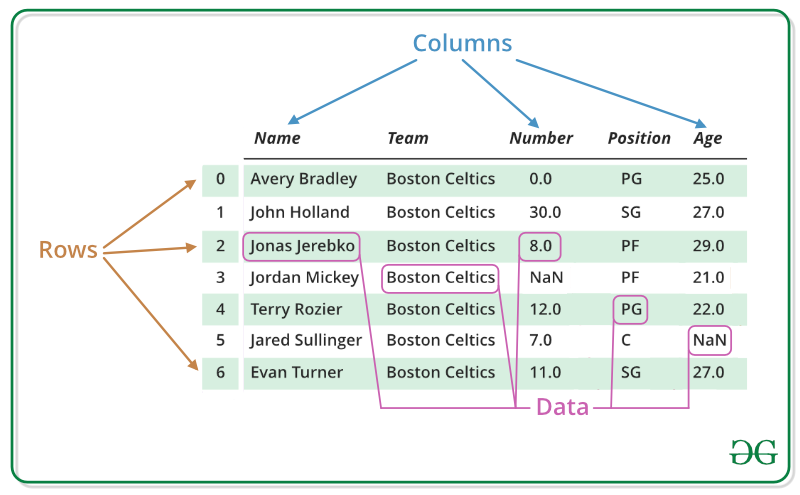

**Nota:** En la siguiente referencia, encontraréis ejemplos para prácticar y las funciones más relevantes:

https://www.geeksforgeeks.org/python-pandas-dataframe/ (fuente de la imagen)


### Pandas: Librería Fundamental para manipulación de DataFrames
**Pandas** es una librería de Python que proporciona estructuras de datos de alto rendimiento y herramientas de análisis de datos. Fue creada para facilitar el manejo y análisis de datos en Python, ofreciendo dos estructuras principales: Series y DataFrames.

Características Clave de Pandas:

- __DataFrame:__

> Pandas proporciona las estructuras de datos DataFrame y Series. Un DataFrame es una colección de Series, y cada Serie es esencialmente una columna en el DataFrame.

- __Indexación y Etiquetado:__

> Los DataFrames y Series en Pandas están etiquetados, lo que facilita la indexación y recuperación de datos.

- __Operaciones Eficientes:__

> Pandas permite realizar operaciones eficientes en grandes conjuntos de datos sin requerir bucles explícitos.

- __Entrada/Salida de Datos:__

>Esta librería puede soportar la lectura y escritura de datos en varios formatos, como CSV, Excel, SQL, y más.

**Nota:** Podéis expandir más información sobre esta librería en la web oficial con toda la documentación de la librería Pandas:

-  https://pandas.pydata.org/pandas-docs/stable/

A continuación, os dejamos algunos ejemplos para trabajar con esta librería:

1.   **Creación de Dataframe**
2.   **Concatenación de Dataframes**
3.   **Ordenar Dataframe por una columna**
4.   **Extraer columna por su nombre**
5.   **Extraer fila por índice**
6.   **Exportar Dataframes**
7.   **Importar csv/tsv/... a Dataframe**


1.  __Creación de Dataframe__

In [ ]:
import pandas as pd

# Creación de DataFrame a partir de diccionario
from_dict = {'Extensión': ['.Fasta', '.Fastq', '.Fa'],
             'Cromosoma': [2, 3, 4],
             'Longitud': [150, 160, 180]}
# Convertimos el diccionario en Dataframe
df_1 = pd.DataFrame(from_dict)

# Muestra el DataFrame inicial
print("DataFrame Inicial:")
df_1

DataFrame Inicial:


,Extensión,Cromosoma,Longitud
0,.Fasta,2,150
1,.Fastq,3,160
2,.Fa,4,180


2. __Concatenación de Dataframes__

In [ ]:
# Añadir Nuevo Dato al DataFrame
dict_2 = {'Extensión': '.fasta.gz',
          'Cromosoma': 15,
          'Longitud': 200}
# Convertimos el diccionario en Dataframe
df_2 = pd.DataFrame([dict_2])
# Combina los DataFrames utilizando concat.

df_combi = pd.concat([df_1, df_2], ignore_index=True)

# Muestra el DataFrame combinado
print("\nDataFrame Combinado:")
df_combi


DataFrame Combinado:


,Extensión,Cromosoma,Longitud
0,.Fasta,2,150
1,.Fastq,3,160
2,.Fa,4,180
3,.fasta.gz,15,200


Nota:`ignore_index=True` es una buena práctica cuando estás combinando DataFrames y deseas que el DataFrame resultante tenga índices secuenciales desde cero.

3.  __Ordenar Dataframe por una columna__

In [ ]:
# Ordenar el DataFrame por columna 'Longitud' en orden descendente
df_combi = df_combi.sort_values(by="Longitud", ascending=False)

# Muestra el DataFrame ordenado
print("\nDataFrame Ordenado por Longitud:")
df_combi


DataFrame Ordenado por Longitud:


,Extensión,Cromosoma,Longitud
3,.fasta.gz,15,200
2,.Fa,4,180
1,.Fastq,3,160
0,.Fasta,2,150


4.  __Extraer columna por su nombre__

In [ ]:
# Extraer una Columna por su nombre
columna_extension = df_combi['Extensión']
print("\nColumna 'Extensión':")
print(columna_extension)
# Se puede convertur a una lista
print("\nColumna 'Extensión' como una lista:")
print(columna_extension.tolist())


Columna 'Extensión':
3    .fasta.gz
2          .Fa
1       .Fastq
0       .Fasta
Name: Extensión, dtype: object

Columna 'Extensión' como una lista:
['.fasta.gz', '.Fa', '.Fastq', '.Fasta']


5.  __Extraer fila por índice__

**Nota:** al ordenar previamente el dataframe, los índices han cambiado (3>2>1>0). Si llamamos el índice 1, obtendremos la fila en la tercera posición.

In [ ]:
# Extraer una Fila por Índice
fila_1 = df_combi.loc[1]
print("\nFila con Índice 1:")
print(fila_1)
# Se puede convertur a una lista
print("\nFila '1' como una lista:")
print(fila_1.tolist())


Fila con Índice 1:
Extensión    .Fastq
Cromosoma         3
Longitud        160
Name: 1, dtype: object

Columna 'Extensión' como una lista:
['.Fastq', 3, 160]


6.  __Exportar Dataframes__

**Nota:**`sep` podemos especificar el separador. En este caso queremos exportar la tabla con tabuladores como separador ('\t')

In [ ]:
# Exportar DataFrame a un archivo CSV
df_combi.to_csv('df_ejemplo.csv', index=False, sep='\t')

7.  __Importar csv/tsv/... a Dataframe__

In [ ]:
# Importar DataFrame desde un archivo CSV
df_importado = pd.read_csv('df_ejemplo.csv', sep='\t')

# Muestra el DataFrame importado
print("\nDataFrame Importado desde CSV:")
df_importado


DataFrame Importado desde CSV:


,Extensión,Cromosoma,Longitud
0,.fasta.gz,15,200
1,.Fa,4,180
2,.Fastq,3,160
3,.Fasta,2,150


### Contenido GC
En genética, el contenido de guanina y citosina (GC) se entiende como el porcentaje entre los pares Guanina-Citosina en la molécula de ADN o genoma y el resto de bases. Este porcentaje se calcula de la siguiente forma:

$(G + C) * 100 / (A + C + G + T)$

En BioPython, calcular el contenido GC es muy sencillo:

In [ ]:
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Creamos un objeto secuencia que contiene los nucleótidos válidos para ADN
# definidos por la IUPAC (Unión Internacional de Química Pura y Aplicada)
seq = Seq("AAGGTGTTCGGTCCTTCCGAGGAAGCTAAGGCCGCGTTGGGGTGAGACCCTCACTTCATCCGGTGAGTAG")

# Calculamos el contenido mediante la función gc_fraction():
gc_fraction(seq)

# Para calcular el porcentaje, multiplicamos por 100
contenido_GC=gc_fraction(seq)*100
print(contenido_GC)

58.57142857142858


### Ejercicio de entrenamiento 1
Para la misma secuencia, escribid el código para calcular el contenido GC sin utilizar la librería BioPython:

In [1]:
seq = "AAGGTGTTCGGTCCTTCCGAGGAAGCTAAGGCCGCGTTGGGGTGAGACCCTCACTTCATCCGGTGAGTAG"
# Respuesta

True

In [9]:
import re
def get_gc_fraction(seq: str) -> float:
    gc_count = 0
    if re seq.lower():
        gc_count +=1

    # Calculate the gc frequency
    gc_freq = (gc_count * 100) / (len(seq))
    return gc_freq

In [10]:
get_gc_fraction(seq)

TypeError: unsupported operand type(s) for |: 'str' and 'str'

### Ejercicio 2  **<font color="blue" size="+2">EG</font>**
Crea una función donde se genere una Dataframe, tabla resumen a partir del archivo `multipleSeqs.fa` que contenga las siguientes columnas:



*   **Id_seq**: Contiene el Id de la secuencia fasta (e.g. NC_001802.1)
*   **G+C_perc**: Contiene el porcentaje de G+C de cada una de las secuencias del archivo multifasta. Redondear a 2 decimales. No se puede usar BioPython para calcularlo.
*   **Purinas_perc**: Contiene el porcentaje de purinas de cada una de las secuencias del archivo multifasta. Redondear a 2 decimales.
*   **Pirimidinas_perc**: Contiene el porcentaje de pirimidinas de cada una de las secuencias del archivo multifasta. Redondear a 2 decimales.
*   **Longitud**: Longitud total de la secuencia

Esta función tiene que recibir como argumento un archivo fasta (utilizaremos el archivo multifasta anterior) y tiene otro argumento (`output_file`) para decidir si guardar o no esta tabla en un archivo. Por defecto, __NO__ se tiene que guardar el archivo. El DataFrame tiene que estar ordenado por la columna `Longitud` de menor a mayor.

Por lo tanto tenemos que crear una variable Dataframe ``"fasta_resumen"`` y generar una tabla en formato tsv (tab separated value) con el nombre: ``"fasta_resumen.tsv"``

**Se puede utilizar la librería BioPython.**


In [ ]:

# Obtenemos el fichero "multipleSeqs.fa"
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/multipleSeqs.fa --no-check-certificate # Descargamos el fichero a nuestro drive


File ‘multipleSeqs.fa’ already there; not retrieving.



In [ ]:
import pandas as pd
from Bio import SeqIO

def resumen_fasta(Fasta_file, output_file = False):
    # Completa con tu respuesta

# Ejemplo de uso:
archivo_multifasta = "multipleSeqs.fa"
fasta_resumen = resumen_fasta(archivo_multifasta, output_file=False)
fasta_resumen

Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
import pytest
# Test Ejercicio 2
def test_gc():
  assert fasta_resumen['Id_seq'].tolist() == ['NC_024512.1','NC_004353.4','NT_033779.5','AM711902.1','NC_019843.3','NC_001802.1']
  assert fasta_resumen['G+C_perc'].tolist() == [33.33, 0.0, 41.04, 42.14, 44.0, 50.27]
  assert fasta_resumen['Purinas_perc'].tolist() == [51.85, 36.8, 50.75, 50.71, 44.33, 59.43]
  assert fasta_resumen['Pirimidinas_perc'].tolist() == [48.15, 63.2, 49.25, 49.29, 55.67, 40.57]

### Ejercicio 3  **<font color="gold" size="+2">CI</font>**
Haz una función para representa gráficamente con un gráfico de barras, bar plot, los porcentajes de cada una de las bases (A/C/G/T) por cada una de las secuencias del archivo `multipleSeqs.fa`. Cada bar plot tiene que tener como titúlo el ID de la secuencia correspondiente (e.g. **Composición de Bases en Secuencia NC_001802.1**). Se puede utilizar la librería BioPython.

Las barras tienen que estar ordenadas de mayor a menor según el porcentaje de cada una de las bases.

A continuación os dejamos un ejemplo de como debería ser uno de esos plots:



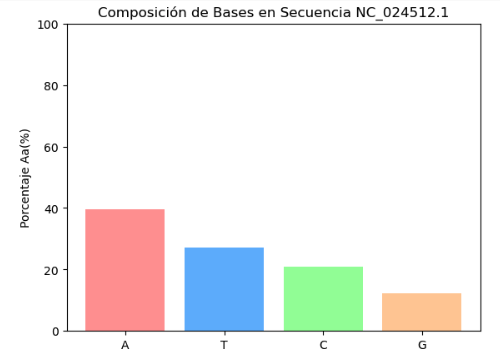



Pista: Se aplica lo aprendido en la unidad 3 (**librería matplotlib**). Consultar la función que genere un bar plot dentro de `matplotlib.pyplot`

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt

def base_barplot(fasta_file):
    # Completa con tu respuesta


# Uso de la función
base_barplot("multipleSeqs.fa")

### Estructura secundaria del ADN
La molécula de ADN tiene una forma de doble hélice. El orden en secuencia de los nucleótidos determina lo que conocemos como estructura primaria del ADN. La doble hélice se forma gracias a la complementariedad de las bases A y T y C y G, respectivamente. Hablamos de estructura secundaria cuando nos referimos a que las bases A y T son complementarias y que C y G también. Por estructura terciaria entendemos cómo se unen estas bases a la estructura principal que las soporta y forma una doble hélice en forma de espiral.

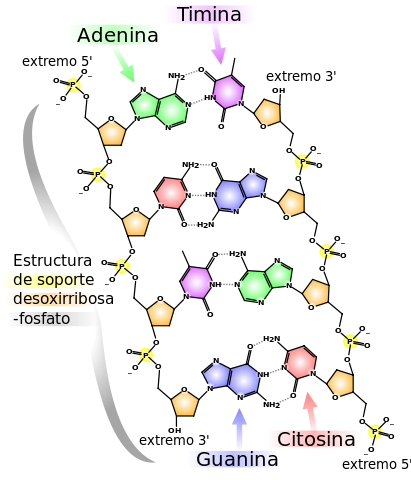

Fuente: "DNA chemical structure" - Wikimedia Commons https://commons.wikimedia.org/wiki/File:DNA_chemical_structure_es.svg#/media/File:DNA_chemical_structure_es.svg)

Es interesante conocer, dada una secuencia con bases A, C, G o T, cuál es su secuencia complementaria.

### Ejercicio de entrenamiento 2

La **replicación** del ADN es el proceso por el cual se copia la información genética contenida en una molécula de ADN a otra molécula de ADN. La **transcripción** es el proceso por el cual el ADN se transcribe a ARN. La información genética almacenada en el ADN se transcribe en ARN mensajero (ARNm) por medio de la actividad de una enzima llamada ARN polimerasa. Podríamos decir que la transcripción se trata de un paso “intermedio”. Finalmente, la **traducción** es el poceso por el cual el ARN se traduce en proteínas. El ARNm se transporta fuera del núcleo hacia el citoplasma donde se une a los ribosomas. Los ribosomas son los responsables de la síntesis de proteínas, y utilizan la información del ARNm para producir la secuencia correcta de aminoácidos que constituirán la proteína.

Dada una cadena de ADN, encuentra su cadena complementaria. Creemos una función que nos devuelva la secuencia complementaria a una cadena de ADN dada. Se especificaría si queremos hacer una replicación (ADN -> ADN) o una transcripción (de ADN-> ARN).

**Replicación:**
*  A (Adenina) se complementa con T (Timina) y C (Citosina) con G (Guanina).

**Transcripción:**
*  A se complementa con U (Uracilo) y C con G.


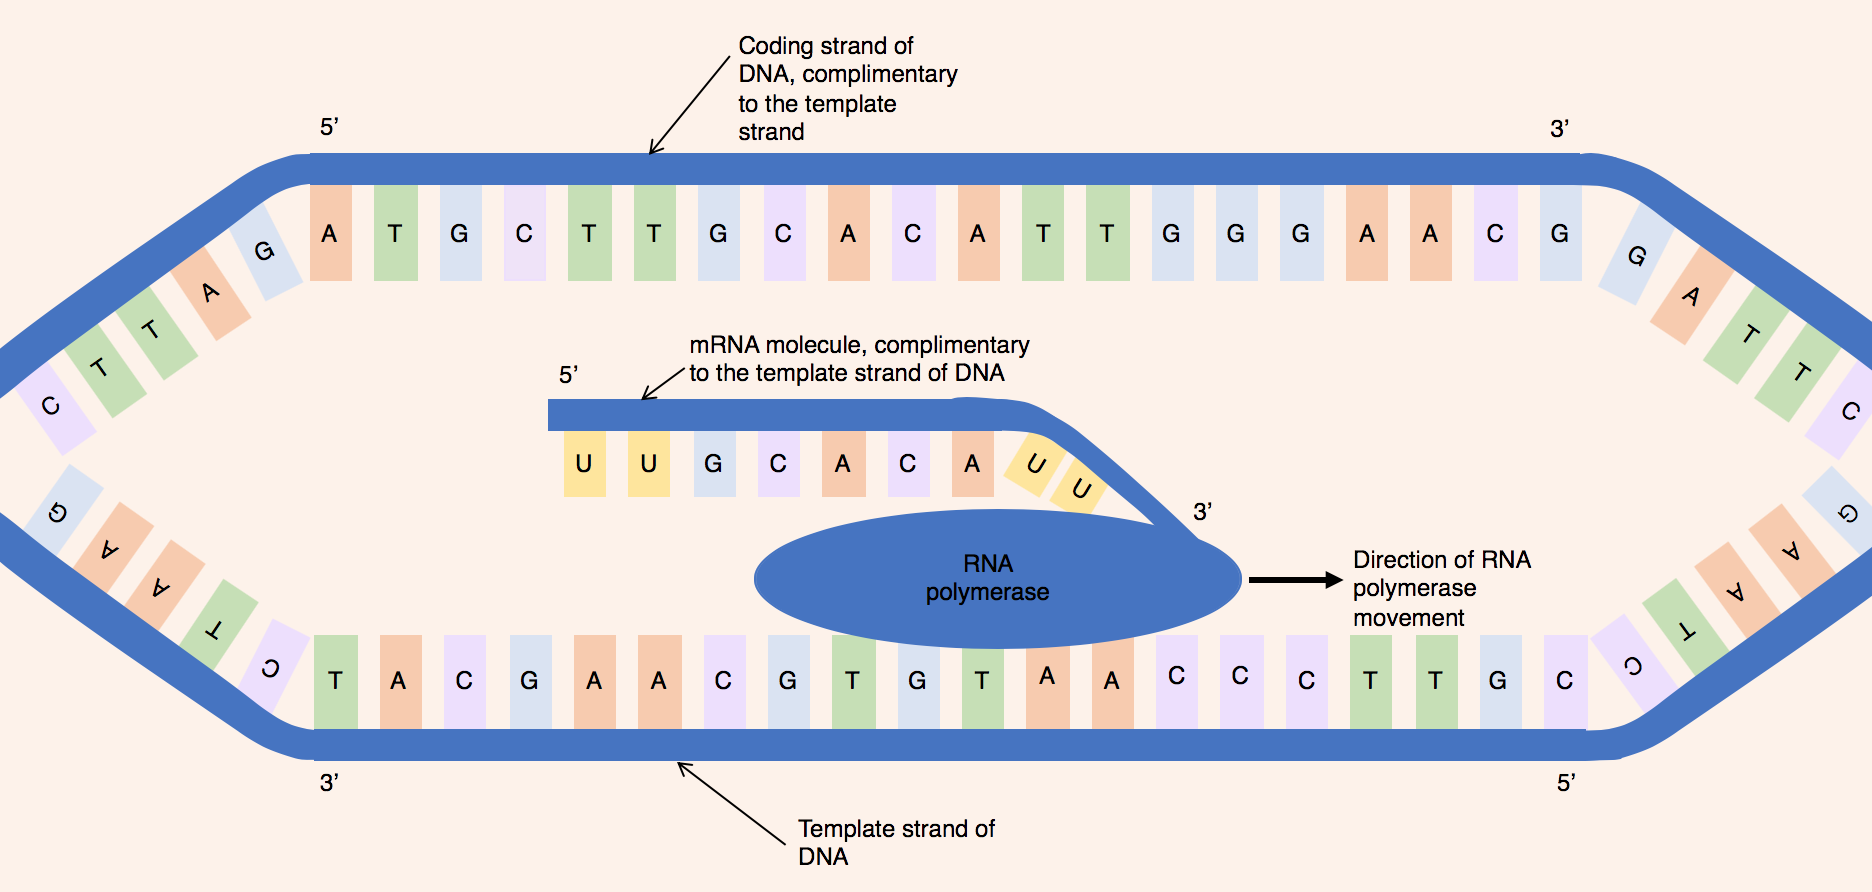

Fuente:  https://upload.wikimedia.org/

**¿Cómo sería una función para crear la cadena complementaria de una cadena de ADN?**

In [ ]:
# Tened en cuenta que cuando se haga la transcripción tenemos que pasar por crear la cadena complementaria y de ahí transcribimos a ARN
def cadena_complementaria(cadena_adn, conversion="replicacion"):
    """
    Dada una cadena de ADN, encuentra su cadena complementaria sin utilizar BioPython.

    Parámetros:
    - cadena_adn (str): La cadena de ADN.
    - conversion (str): El tipo de conversión ("replicacion" o "transcripcion").

    Devuelve:
    - str: La cadena complementaria resultante.
    """

#RESPUESTA

# Ejemplos de uso:
ADN_1 = "ATCG" # 5' -> 3'

complemento_replicacion = cadena_complementaria(ADN_1, conversion="replicacion")
complemento_transcripcion = cadena_complementaria(ADN_1, conversion="transcripcion")

print("Replicación:", complemento_replicacion, " # 5' -> 3'")

print("Transcripción:", complemento_transcripcion, "# 5' -> 3'")


### Ejercicio 4  **<font color="blue" size="+2">EG</font>**

En biología molecular, las secuencias promotoras controlan el inicio de la transcripción de los genes. Algunas veces, los promotores están ubicados en la hebra complementaria del ADN.
Por ello, es importante calcular la **reversa complementaria** para analizar correctamente la región promotora.

La siguiente secuencia está inspirada en el promotor consenso de E. coli, con las cajas –35 (TTGACA) y –10 (TATAAT) separadas por ~17 pb.

**Usando la librería BioPython**, escribe una función **reversa_complementaria(seq_promotor)** que reciba una secuencia de ADN promotora y devuelva una lista con: la secuencia original, su complemento, y la reversa complementaria. **En ese mismo orden.**

In [ ]:
from Bio.Seq import Seq
promotor = Seq("TTGACATGCTTACGATCGTATAATAGCGCCGATGAGCT") # TOCOPY

In [ ]:
def reversa_complementaria(seq_promotor):
  # Respuesta

# Ejemplo de uso
reversa_complementaria(promotor)

Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
# Test Ejercicio 4
def test_compl():
  assert reversa_complementaria(promotor)[0] == 'TTGACATGCTTACGATCGTATAATAGCGCCGATGAGCT'
  assert reversa_complementaria(promotor)[1] == 'AACTGTACGAATGCTAGCATATTATCGCGGCTACTCGA'
  assert reversa_complementaria(promotor)[2] == 'AGCTCATCGGCGCTATTATACGATCGTAAGCATGTCAA'

### Transcripción y traduccion
Como ya explicamos, el ADN se transcribe a una molécula intermedia, el ARN, antes de ser traducido finalmente a proteína. Podemos simular también este aparato biológico mediante la libreria BioPython:

In [ ]:
from Bio.Seq import Seq

seq = Seq("ACGACACAGCAAGAAGTCCATACCTTATCATTTAGAGGAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAACCCTGA")

# Transcribimos
mRNA = seq.transcribe()

# Y traducimos
mRNAt=mRNA.translate()
print (mRNAt)

# El * indica que es un codon que no se traduce a proteina. En este caso se trata de un codón stop.

TTQQEVHTLSFRGRRSRNKVSVGEP*


### Acción de enzimas

Las enzimas desempeñan un papel fundamental en la biología al influir en la **estructura y función** de moléculas vitales como el **ADN, ARN y proteínas**. Estas moléculas actúan como instrucciones genéticas y maquinaria celular, y las enzimas facilitan procesos clave, como la replicación del ADN, la transcripción del ADN a ARN y la síntesis de proteínas. Además, las enzimas participan en la modificación y reparación de estas moléculas, asegurando la integridad y la funcionalidad del material genético y las proteínas esenciales para la vida.


### Ejercicio de entrenamiento 3

La transcriptasa inversa es una enzima que cataliza la síntesis de ADN a partir de un molde de ARN encontrada en algunos virus (e.g. VIH). Crea una función que simule la acción de una transcriptasa inversa, pero solamente cambiando Uracilos por Timinas.

In [ ]:
# Transformemos las Timinas por Uracilo
def transcriptasa_inversa(arn_molde):
    """
    Simula la acción de una transcriptasa inversa que transcribe ARN a ADN.

    Parameters:
    - arn_molde (str): La secuencia de ARN que se va a convertir a ADN.

    Returns:
    - str: La secuencia de ADN resultante.
    """
# Respuesta

# Cadena de ARN de ejemplo
ARN_4 = "AUGCAUCGUAGCGUAAUGCUAGCAUAGCGUGA"
# Llamada a la función de transcriptasa inversa
cadena_adn_resultante = transcriptasa_inversa(ARN_4)
print(cadena_adn_resultante)

### Ejercicio de entrenamiento 4

Las endonucleasas son enzimas que cortan el ADN en sitios específicos. Define una función que simule la acción de una endonucleasa dividiendo una secuencia dad en dos partes. Para simplificar el proceso el sitio de corte sera proporionado mediante un valor numérico.

In [ ]:
# Simulación simplificada de la función de corte del ADN de una endonucleasa
def endonucleasa_escision(dna_sequence, sitio_corte):
    """
    Simula la acción de una endonucleasa que escinde el ADN en un sitio específico.

    Parameters:
    - dna_sequence (str): La secuencia de ADN que se va a cortar.
    - sitio_corte (int): La posición en la que la endonucleasa cortará el ADN.

    Returns:
    - tuple: Las dos hebras de ADN resultantes después del corte.
    """
#Respuesta


# Cadena de ADN de ejemplo
ADN_5 = "ATGATCGTAGCGTAAATGCTAGCATAGCGTGA"
# Llamada a la función de endonucleasa
hebra1_resultante, hebra2_resultante = endonucleasa_escision(ADN_5, 10)
print("Cadena origen : ", ADN_5)
print("Sitio de corte: ", 10)
print("Hebra 1: ", hebra1_resultante)
print("Hebra 2: ", hebra2_resultante)

### Ejercicio 5 <font color="green" size="+2">MU</font>

La enzima de restricción EcoRI reconoce la secuencia GAATTC y realiza un corte cohesivo (sticky end) entre la G y la A:
G↓AATTC

Este tipo de corte genera extremos cohesivos de cuatro bases (“salientes”), lo que facilita la unión dirigida entre fragmentos de ADN complementarios durante procesos de clonación molecular.

Escribe una función EcoRI(plasmido) que reciba una cadena de ADN (representando un plásmido) y devuelva la secuencia cortada en el primer sitio de reconocimiento de EcoRI, usando ' + ' para marcar el punto de corte.

**No usar Biopython.**

Si no hay sitio de corte, la función debe devolver la secuencia original. Ejemplo:
EcoRI("ATCGGAATATCA")

output: ATCGG + AATATCA

In [ ]:
seq = "ATCGGAATTCTAGCGTGAATTCGATC"

def EcoRI(plasmido):
    # Motivo de reconocimiento
    motivo = "GAATTC"
    # Respuesta


EcoRI("ATCGGAATTCTAGCGTGAATTCGATC")

Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
# Test Ejercicio 5
def test_EcoRI():
  assert EcoRI(seq) == "ATCGG + AATTCTAGCGTGAATTCGATC"


### Codones
Un codón es un triplete de nucleótidos y cada triplete codifica un aminoácido (residuo), aunque un aminoácido puede estar codificado por varios codones. Existe un codón especial, el codón de parada o terminación que no determina ningún aminoácido, pero que indica que la traducción ha de terminar y la proteína está completa. Para la traducción en aminoácidos se necesita de una **secuencia de inicio o start: ATG** Existen tres codones de **parada o stop: TAG, TGA y TAA**. En nuestro ejemplo, la librería nos avisa de este hecho.



Podéis consultar una tabla de codones aquí: https://en.wikipedia.org/wiki/DNA_codon_table.

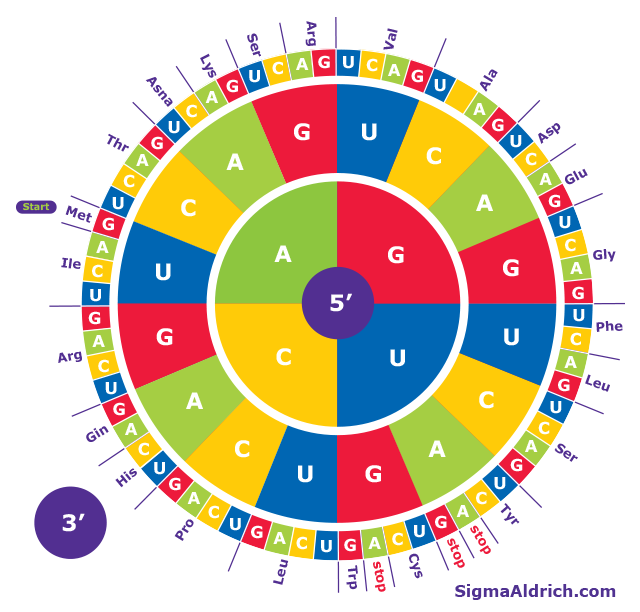

Fuente de la imágen: [www.sigmaaldrich.com](https://www.sigmaaldrich.com/ES/es/technical-documents/technical-article/genomics/sequencing/amino-acid-codon-wheel)


La "forward strand" del ADN, también conocida como "cadena de hebra directa" o "cadena directa", se refiere a la cadena de la doble hélice cuya secuencia de nucleótidos se lee en la dirección 5' a 3'. Este término es fundamental en el contexto de la información genética contenida en el ADN. La dirección 5' a 3' significa que la lectura de la secuencia de nucleótidos se realiza de izquierda a derecha en esta cadena específica. Podéis ampliar la información en los siguientes links:

- [Cadena de sentido](https://es.wikipedia.org/wiki/Cadena_de_sentido)
- [Transcripción genética](https://es.wikipedia.org/wiki/Transcripci%C3%B3n_gen%C3%A9tica)


Este concepto es esencial para entender los procesos biológicos asociados con la expresión génica. Durante la transcripción, en la cual el ARN mensajero (ARNm) se genera a partir del ADN, la información se transcribe desde la "forward strand" hacia el ARNm. Posteriormente, en la traducción, la información contenida en el ARNm guía la síntesis de proteínas. En este contexto, la "forward strand" sirve como la cadena principal que dicta la secuencia de aminoácidos en la proteína resultante. En la siguiente imagen se representa el codón de inicio y uno de los posibles codones de parada o stop:

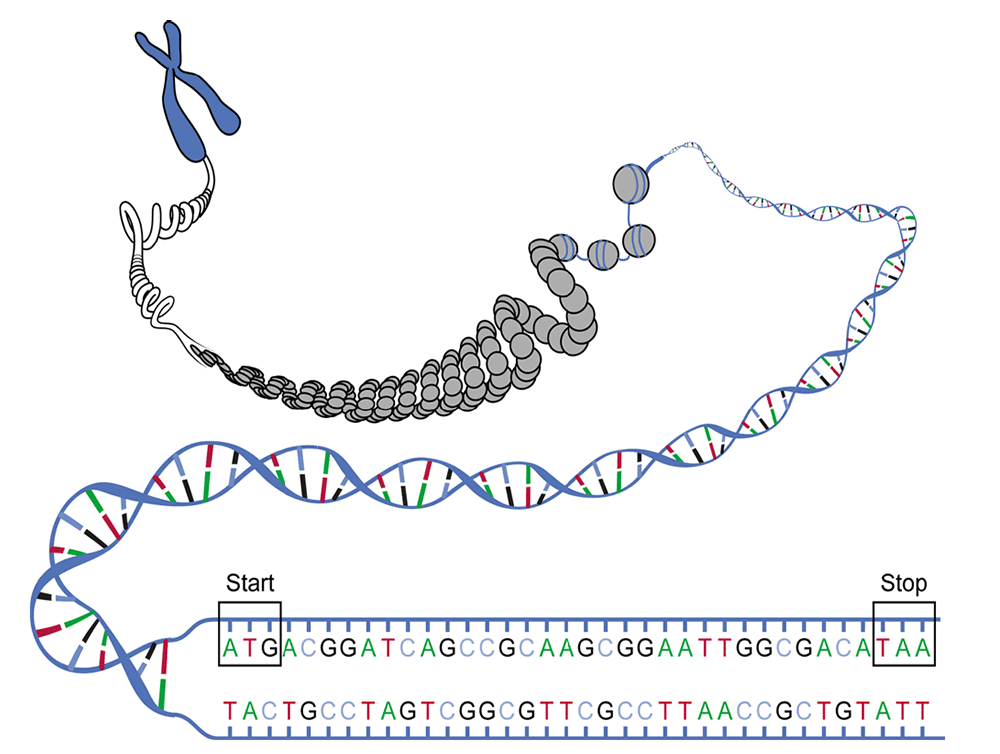

Fuente de la imágen: https://es.wikipedia.org/wiki/Cod%C3%B3n_de_inicio#/media/Archivo:DNA_ORF.png

### Ejercicio 6  **<font color="blue" size="+2">EG</font>**
En este ejercicio, tenéis que crear una función que se detecten los codones stop de una secuencia de DNA forward y sus posiciones (en lenguaje python, es decir, comenzando por 0). Para este caso hay que extraer los codones stop (keys) y sus posiciones (values) en un diccionario. La secuencia es la siguiente: "TAAATGCAAATCGCTTGCATTGACAAGGCTAAGGTTGACTTAG"

**Pista:**

Dentro de Bio.SeqUtils hay una función que detecta secuencias de DNA y sus posiciones.

In [ ]:
codons_stop = ["TAA", "TAG", "TGA"]

def encontrar_codones_stop(secuencia_adn_codificante):
     # Completa con tu respuesta

# Secuencia para extraer codones stop y sus posiciones
secuencia_adn_codificante = "TAAATGCAAATCGCTTGCATTGACAAGGCTAAGGTTGACTTAG"

codones_stop = encontrar_codones_stop(secuencia_adn_codificante)


Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
# Test Ejercicio 6
def test_encontrar_codones_stop():
  assert codones_stop['TAA'] == [0, 29]
  assert codones_stop['TAG'] == [40]
  assert codones_stop['TGA'] == [20, 35]

### Distancia de Hamming
La distancia de Hamming es una función entre dos secuencias *p* y *q* (en nuestro caso nos limitaremos a secuencias de la misma longitud), que nos indica el número de símbolos que para cada posición *i* en *p* y *q* son diferentes. Por ejemplo, sea p=CCGTA y q=ACGTC. Su distancia de Hamming será 2 (la primera y última posiciones son diferentes).

### Ejercicio 7  **<font color="green" size="+2">MU</font>**
Dadas dos secuencias p y q, calculad su distancia de hamming:

In [ ]:
p = 'ATTGCCCATAACGTCCCTCAGTAATTCCACTGCACTCGCCACCTTTTTTTTGCAGCTGCTGTGTGCTGGAGCT\
GACCCCTCGGTAATCTCTTGTCTGCTTTTTAGGAACTCCTATCTCCAGATCTTCTTTTACTTCCCAA'

q = 'AATGCCCATAACGTCCCTCACTAATTCCACTGCATTTACTTTGCAGCTGCTGTGTGCTGTAGCTGTGAGGAAC\
GCACCCAACTCATCTCTTGTCTGCTTTTTAGGAACCCTATCTCCAGAACTCTTCTTTTACTTAAGGC'

def hamming(p, q):
    # Completar con tu respuesta

Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
# Test Ejercicio 7
def test_hamming():
  assert hamming(p, q) == 69


### Motivos
En genómica, es habitual encontrar regiones de ADN idénticas en secuencia en genomas de organismos diferentes, lo que apunta a que se trata de una región conservada con muy probablemente una función muy parecida en ambos organismos.

En nuestro caso, entenderemos por motivo una secuencia *s* con longitud menor a la secuencia *t* donde querremos buscar ese motivo *len(s) < len(t)*. Por ejemplo, sean *t* y *s*:

t = GATATATGCATATACTT<br>
s = ATAT<br>

el motivo *s* aparece en las siguientes posiciones: 2, 4 y 10 (empezamos a contar en 1, no es así en Python, donde empezamos a contar desde 0).

### Ejercicio 8  **<font color="green" size="+2">MU</font>**
Escribid una función que devuelva en una lista las posiciones donde se ha encontrado el motivo en una determinada secuencia (**devolverá la lista [-1] si no ha encontrado el motivo**):

In [ ]:
def buscar_motivo(t, s):
    # Codigo a completar
    return [-1]

t = 'AUGCUUCAGAAAGGUCUAUACGUGCUUUA'
s = 'CUUA'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
s = 'CUU'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
s = 'UA'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGAAAGGUCUUACGU'
s = 'G'
print(buscar_motivo(t, s))

t = 'GCGTAGTAGGTTCAAAGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCT\
AGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'
s = 'AAG'
print(buscar_motivo(t, s))

t = 'GCGTAGTAGGTTCGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCT\
AGTAGTTTCAGTATAGCAAACATGTTATAACGCCTAACTGTGTGCTGCA'
s = 'AGTC'
print(buscar_motivo(t, s))

Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
# Test Ejercicio 8
def test_motivo():
  t = 'AUGCUUCAGAAAGGUCUAUACGUGCUUUA'
  s = 'CUUA'
  assert buscar_motivo(t, s) == [-1]

  t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
  s = 'CUU'
  assert buscar_motivo(t, s) == [3, 15]

  t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
  s = 'UA'
  assert buscar_motivo(t, s) == [17, 23, 32]

  t = 'AUGCUUCAGAAAGGUCUUACGU'
  s = 'G'
  assert buscar_motivo(t, s) == [2, 8, 12, 13, 20]

  t = 'GCGTAGTAGGTTCAAAGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCT\
  AGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'
  s = 'AAG'
  assert buscar_motivo(t, s) == [14, 31, 37, 43]

  t = 'GCGTAGTAGGTTCGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCT\
  AGTAGTTTCAGTATAGCAAACATGTTATAACGCCTAACTGTGTGCTGCA'
  s = 'AGTC'
  assert buscar_motivo(t, s) == [-1]


### Mutaciones puntuales
Tal y como calculamos en la distancia de Hamming, para dos secuencias de la misma longitud y dada una misma posición, definimos transición como la sustitución de una purina por otra purina (A->G o viceversa) o de una pirimidina por otra pirimidina (C->T o viceversa) y transversión cuando se sustituye una purina por una pirimidina o viceversa:

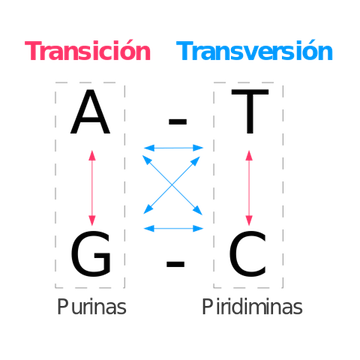

Las transversiones ocurren en menor cantidad en la naturaleza que las transiciones, dado el cambio drástico de base química y la relación de transiciones frente a las transversiones, que es de 2 de media en el genoma. Pero en las regiones codificantes, esta relación es superior (normalmente más de 3) y es interesante conocer por tanto esta relación para identificar dichas regiones.

Definimos R como la relación transiciones/transversiones. Para el siguiente ejemplo, hemos calculado el valor de R:

s1 = GCAACGCACAACGAAAACCCTTAGGGACTGGATTATTTCGTGATCGTTGTAGTTATTGGAAGTACGGGCATCAACCCAGTT<br>
s2 = TTATCTGACAAAGAAAGCCGTCAACGGCTGGATAATTTCGCGATCGTGCTGGTTACTGGCGGTACGAGTGTTCCTTTGGGT<br>

R = 1.2142857



### Ejercicio 9  **<font color="green" size="+2">MU</font>**
Escribid un código en Python que calcule la relación entre transiciones y transversiones:

In [ ]:
def rel_trans(s1, s2):
    # Codigo a completar
    return 0.

s1 = """GCAACGCACAACGAAAACCCTTAGGGACTGGATTATTTCGTG
ATCGTTGTAGTTATTGGAAGTACGGGCATCAACCCAGTT"""
s2 = """TTATCTGACAAAGAAAGCCGTCAACGGCTGGATAATTTCGCG
ATCGTGCTGGTTACTGGCGGTACGAGTGTTCCTTTGGGT"""

print(rel_trans(s1, s2))


Testea que tu código es correcto con el siguiente test unitario


In [ ]:
%%ipytest
import pytest
# Test Ejercicio 9
def test_rel_trans():
  s1 = """GCAACGCACAACGAAAACCCTTAGGGACTGGATTATTTCGTG
  ATCGTTGTAGTTATTGGAAGTACGGGCATCAACCCAGTT"""
  s2 = """TTATCTGACAAAGAAAGCCGTCAACGGCTGGATAATTTCGCG
  ATCGTGCTGGTTACTGGCGGTACGAGTGTTCCTTTGGGT"""
  assert rel_trans(s1, s2) == pytest.approx(1.2142857142857142)

### Filogenia
BioPython nos permite manejar y representar árboles filogenéticos (https://es.wikipedia.org/wiki/%C3%81rbol_filogen%C3%A9tico) de forma ágil y sencilla. En el siguiente ejemplo, utilizamos un fichero de nombre *simple.dnd* que representa un árbol en formato Newick (https://en.wikipedia.org/wiki/Newick_format) y lo representamos:

--2022-11-20 20:51:08--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/simple.dnd
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 54.194.143.155
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|54.194.143.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44 [text/plain]
Saving to: ‘simple.dnd’

simple.dnd          100%[===================>]      44  --.-KB/s    in 0s      

2022-11-20 20:51:09 (4.49 MB/s) - ‘simple.dnd’ saved [44/44]

Tree(rooted=True, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade()
                    Clade(name='C')
                    Clade(name='D')
                        Clade(name='E')
                        Clade(name='F')
        Clade()
            Clade()
                Clade(name='G')
                Clade(name='H')
                    Clade(name='I')
               

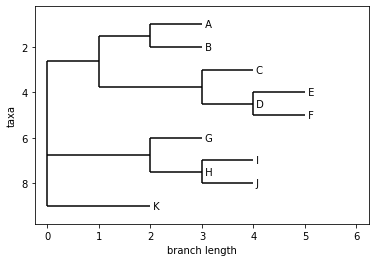

In [ ]:
%matplotlib inline

from Bio import Phylo

# Cargamos el árbol desde el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/simple.dnd --no-check-certificate # Descargamos el fichero a nuestro drive
tree = Phylo.read("simple.dnd", "newick")

# El árbol tiene una raíz
tree.rooted = True

# Imprimimos la representación del árbol
print(tree)

# Creamos una imagen del árbol
Phylo.draw(tree)

### Ejercicio 10  **<font color="blue" size="+2">EG</font>**
Las posibilidades que ofrece la librería son muy variadas, podéis revisar la documentación oficial: http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc154

Diseñad vuestro propio árbol filogenético en algún formato reconocible por BioPython y representadlo de alguna de las formas posibles. Tened en cuenta que algunas opciones necesitarían librerías extra como networkx o graphviz. En ese caso, no las utilicéis puesto que necesitaréis instalar esas librerías por separado.

In [ ]:
# Respuesta

### Aliniamiento de secuencias
La alineación de secuencias es una herramienta esencial en bioinformática que permite comparar y analizar similitudes y diferencias entre diferentes secuencias biológicas. Este proceso es crucial para entender la estructura y función de las biomoléculas, como el ADN, y para realizar comparaciones evolutivas entre organismos.

**Referencias:**

Mount, D. W. (2004). Bioinformatics: Sequence and Genome Analysis. Cold Spring Harbor Laboratory Press.

Durbin, R., Eddy, S. R., Krogh, A., & Mitchison, G. (1998). Biological Sequence Analysis: Probabilistic Models of Proteins and Nucleic Acids. Cambridge University Press.

Lengauer, T., & Rantala, J. (2002). Bioinformatics: From Genomes to Drugs. Wiley-VCH.

### Ejercicio 11  **<font color="blue" size="+2">EG</font>**
Tenemos dos secuencias de ADN, y queremos realizar un alineamiento para identificar regiones de homología. En el siguiente ejercicio, utilizamos Biopython para realizar un alineamiento de secuencias de ADN y visualizar el resultado con un gráfico en matriz.

**Pista:** las zonas donde coincidan (se alinean) deberían estar coloreadas de un color diferente al fondo. (e.g.1 = azul, 0 = blanco)

Tienes que obtener una imagen similar a la que se muestra a conitnuacion:

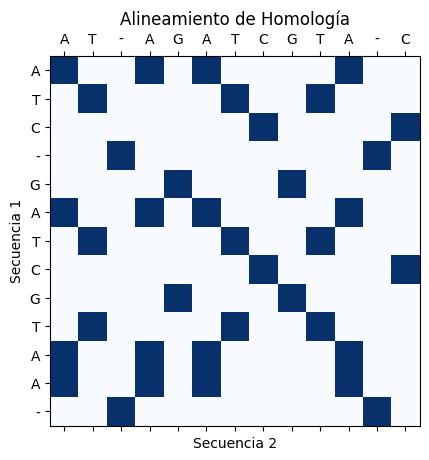

Podéis inspiraros en los siguientes ejemplos de `matplotlib`
-  [Ejemplo plot matriz 1](https://www.geeksforgeeks.org/matplotlib-axes-axes-matshow-in-python/)
- [Ejemplo plot matriz 2](https://matplotlib.org/stable/gallery/images_contours_and_fields/matshow.html#sphx-glr-gallery-images-contours-and-fields-matshow-py)

In [ ]:
# Secuencias de ADN
secuencia1 = Seq.Seq("ATCGATCGTAA") # Eje Y
secuencia2 = Seq.Seq("ATAGATCGTAC") # Eje X

# Respuesta

**Autoria**

Autores/as que han participado colectivamente en esta obra:

*   Gabriel Felipe Rodríguez Lozano
*   Pau Andrio Balado
*   Brian Jiménez García
*   Melchor Sanchez Martinez

**Fecha de creación**


*   Ultima modificación: Noviembre 2025